In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import os
import json
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
from datetime import datetime
import pandas as pd
import seaborn as sns

sys.path.append(os.path.abspath('../'))
from data import Data

In [99]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 7
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

In [3]:
d = Data()

In [9]:
playlistDataDF = d.loadFormattedPlaylists(1000)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.84it/s]


In [ ]:
playlistDataDF = playlistDataDF.infer_objects() # object --> int

In [136]:
d.savePlaylistDf(playlistDataDF)

In [52]:
playlistDataDF = d.loadPlaylistDf()

In [107]:
playlistDataDF['modified_at_week_day'] = playlistDataDF.modified_at.apply(lambda x: datetime.fromtimestamp(x).strftime('%A'))

In [108]:
playlistDataDF['modified_at_week_day'].unique()

array(['Saturday', 'Thursday', 'Monday', 'Wednesday', 'Friday', 'Tuesday',
       'Sunday'], dtype=object)

In [134]:
playlistDataDF['modified_at_date'] = playlistDataDF[['modified_at_day', 'modified_at_month', 'modified_at_year']].apply(lambda x: '{}/{}/{}'.format(x[0],x[1],x[2]), axis=1)

In [141]:
playlistDataDF['modified_at_date'].unique().size

2294

In [145]:
playlistDataDF.modified_at_date.value_counts().head(100)

31/10/2017    19018
30/10/2017    15495
27/10/2017    11640
29/10/2017    11083
28/10/2017     9994
26/10/2017     9727
25/10/2017     9142
24/10/2017     8588
23/10/2017     7953
20/10/2017     6980
22/10/2017     6407
19/10/2017     5986
21/10/2017     5979
18/10/2017     5792
17/10/2017     5653
16/10/2017     5375
13/10/2017     4840
15/10/2017     4483
12/10/2017     4460
14/10/2017     4431
1/11/2017      4372
10/10/2017     4277
11/10/2017     4176
9/10/2017      4170
6/10/2017      4001
3/10/2017      3736
5/10/2017      3644
4/10/2017      3530
8/10/2017      3493
7/10/2017      3455
              ...  
17/8/2017      1863
24/8/2017      1856
22/8/2017      1845
19/8/2017      1806
27/8/2017      1793
4/8/2017       1791
23/8/2017      1746
15/8/2017      1734
14/8/2017      1718
28/7/2017      1716
8/8/2017       1707
10/8/2017      1686
16/8/2017      1682
21/8/2017      1674
9/8/2017       1671
20/8/2017      1668
12/8/2017      1663
14/7/2017      1657
21/7/2017      1636


In [5]:
playlistDataDF.shape

(1000000, 13)

In [6]:
type(playlistDataDF)

pandas.core.frame.DataFrame

In [135]:
playlistDataDF.head(10)

,num_artists,num_albums,num_tracks,num_followers,num_edits,modified_at,modified_at_month,modified_at_year,modified_at_day,duration_ms,duration_sec,duration_min,collaborative,modified_at_week_day,modified_at_date
0,37,47,52,1,6,1493424000,4,2017,29,11532414,11532.414,192.206900,false,Saturday,29/4/2017
1,21,23,39,1,5,1506556800,9,2017,28,11656470,11656.470,194.274500,false,Thursday,28/9/2017
2,31,51,64,1,18,1505692800,9,2017,18,14039958,14039.958,233.999300,false,Monday,18/9/2017
3,86,107,126,1,4,1501027200,7,2017,26,28926058,28926.058,482.100967,false,Wednesday,26/7/2017
4,16,16,17,2,7,1401667200,6,2014,2,4335282,4335.282,72.254700,false,Monday,2/6/2014
5,56,71,80,1,3,1430956800,5,2015,7,19156557,19156.557,319.275950,false,Thursday,7/5/2015
6,13,15,16,1,2,1477094400,10,2016,22,3408479,3408.479,56.807983,false,Saturday,22/10/2016
7,48,52,53,1,38,1509321600,10,2017,30,12674796,12674.796,211.246600,false,Monday,30/10/2017
8,23,37,46,2,21,1508976000,10,2017,26,9948921,9948.921,165.815350,false,Thursday,26/10/2017
9,18,20,21,1,10,1501804800,8,2017,4,4297488,4297.488,71.624800,false,Friday,4/8/2017


In [8]:
playlistDataDF['modified_at_day'].unique()

array([29, 28, 18, 26, 2, 7, 22, 30, 4, 8, 13, 27, 24, 9, 1, 14, 31, 21,
       17, 11, 10, 23, 20, 3, 16, 5, 19, 6, 15, 25, 12], dtype=object)

In [4]:
trackDataDF = d.loadFormattedTracks(1000)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [16:56<00:00,  1.02s/it]


In [16]:
trackDataDF.head()

,album_name,album_uri,artist_name,artist_uri,duration_ms,pos,track_name,track_uri
0,The Cookbook,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk,226863,0,Lose Control (feat. Ciara & Fat Man Scoop),spotify:track:0UaMYEvWZi0ZqiDOoHU3YI
1,In The Zone,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,Britney Spears,spotify:artist:26dSoYclwsYLMAKD3tpOr4,198800,1,Toxic,spotify:track:6I9VzXrHxO9rA9A5euc8Ak
2,Dangerously In Love (Alben für die Ewigkeit),spotify:album:25hVFAxTlDvXbx2X2QkUkE,Beyoncé,spotify:artist:6vWDO969PvNqNYHIOW5v0m,235933,2,Crazy In Love,spotify:track:0WqIKmW4BTrj3eJFmnCKMv
3,Justified,spotify:album:6QPkyl04rXwTGlGlcYaRoW,Justin Timberlake,spotify:artist:31TPClRtHm23RisEBtV3X7,267266,3,Rock Your Body,spotify:track:1AWQoqb9bSvzTjaLralEkT
4,Hot Shot,spotify:album:6NmFmPX56pcLBOFMhIiKvF,Shaggy,spotify:artist:5EvFsr3kj42KNv97ZEnqij,227600,4,It Wasn't Me,spotify:track:1lzr43nnXAijIGYnCT8M8H


In [21]:
trackDataDF.duplicated('track_name')

0           False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
            ...  
13307795     True
13307796     True
13307797     True
13307798     True
13307799     True
13307800     True
13307801     True
13307802     True
13307803     True
13307804     True
13307805     True
13307806     True
13307807     True
13307808     True
13307809     True
13307810     True
13307811     True
13307812     True
13307813     True
13307814     True
13307815     True
13307816     True
13307817     True
13307818     True
13307819  

Tracks are duplicated.

In [23]:
trackDataDF.size

10719696

## Basic Stats

In [26]:
trackDataDF['artist_name'].describe()

count     335094
unique     24551
top        Drake
freq        4620
Name: artist_name, dtype: object

In [9]:
trackDataDF['album_name'].describe()

count     33119074
unique      437509
top          Views
freq        104556
Name: album_name, dtype: object

In [10]:
trackDataDF['track_name'].describe()

count     33119074
unique     1081685
top         Closer
freq         34105
Name: track_name, dtype: object

## Track Duration Distribution

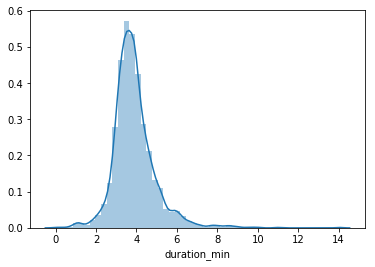

In [67]:
sns.distplot(trackDataDF['duration_min'])

## Playlist Univariate Distributions

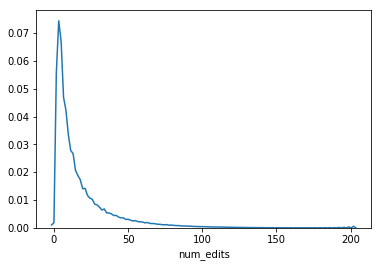

In [8]:
sns.distplot(playlistDataDF['num_edits'], hist=False)

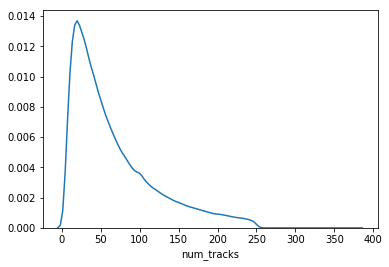

In [10]:
sns.distplot(playlistDataDF['num_tracks'], hist=False)

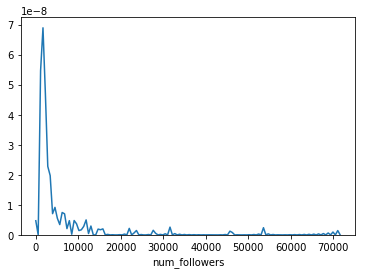

In [11]:
sns.distplot(playlistDataDF['num_followers'], hist=False)

Further analysis could be performed on playlists with only greater than less than 10000 followers and more than 10000 followers.

num_artists
194    27
195    22
196    21
197    17
198    23
199    21
200    15
201    10
202     9
203    20
204    21
205    10
206    10
207    12
208    14
209     9
210     6
211     9
212     7
213     8
214     6
215     6
216     3
217     5
218     7
219     7
220     1
221     1
222     2
223     5
224     5
225     4
227     1
228     2
229     3
230     1
231     3
232     1
234     1
238     2
dtype: int64

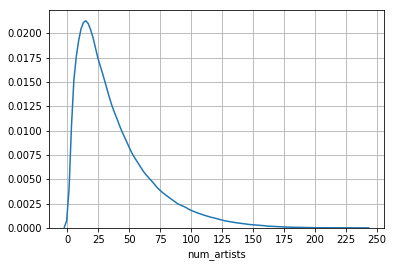

In [48]:
plt.xticks(np.arange(0, 251, 25))
plt.grid()
sns.distplot(playlistDataDF['num_artists'], hist=False)
playlistDataDF.groupby(['num_artists']).size().tail(40)

Playlists do not exist with more than 238 artists even though 250 is the maximum. 100 artists or more in a playlist is rare. 

num_albums
200    216
201    219
202    213
203    187
204    196
205    146
206    155
207    151
208    151
209    133
210    116
211    129
212    144
213     92
214     87
215    100
216     80
217     70
218     62
219     75
220     54
221     55
222     48
223     44
224     33
225     38
226     28
227     32
228     22
229     26
230     12
231     13
232      9
233     10
234     10
235      4
236      6
237      3
238      2
239      4
240      3
241      3
242      3
243      2
244      1
dtype: int64

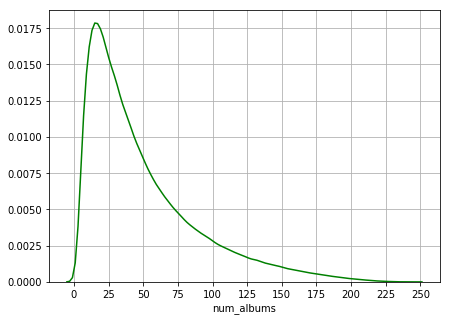

In [93]:
plt.xticks(np.arange(0, 251, 25))
plt.grid()
sns.distplot(playlistDataDF['num_albums'], color='g', hist=False)
playlistDataDF.groupby(['num_albums']).size().tail(45)

Sharp drop in number of albums in playlists at the 212 mark. Most frequently occuring number of albums in a playlist is 15. The album and artist distributions share similar characteristics.

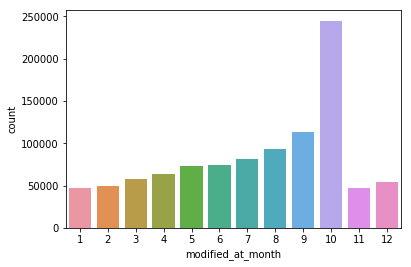

In [24]:
sns.countplot(x='modified_at_month', data=playlistDataDF)

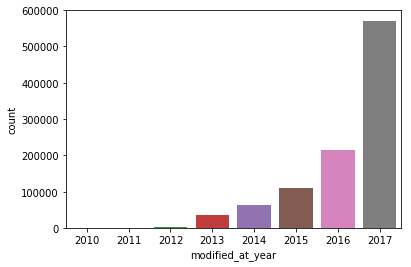

In [26]:
sns.countplot(x='modified_at_year', data=playlistDataDF)

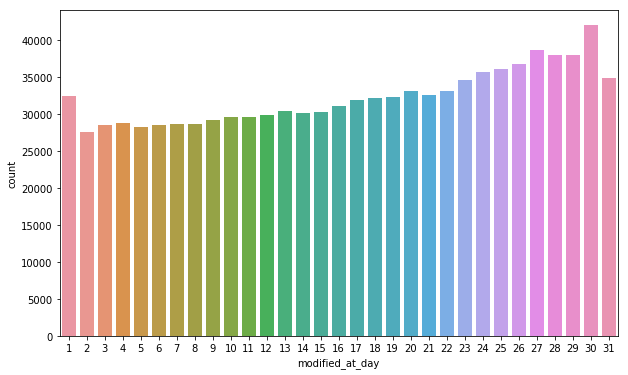

In [120]:
plt.figure(figsize=(10,6))
sns.countplot(x='modified_at_day', data=playlistDataDF)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


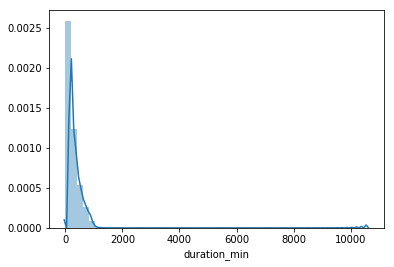

In [32]:
sns.distplot(playlistDataDF['duration_min'])

## Playlist Edits (checking collaboration)

In [41]:
playlist_dist_collab_on = dict()
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        if playlist["collaborative"] == 'true':
            if playlist["num_edits"] not in playlist_dist_collab_on:
                playlist_dist_collab_on[playlist["num_edits"]] = 1
            else:
                playlist_dist_collab_on[playlist["num_edits"]] += 1

In [42]:
playlist_dist_collab_off = dict()
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        if playlist["collaborative"] == 'false':
            if playlist["num_edits"] not in playlist_dist_collab_off:
                playlist_dist_collab_off[playlist["num_edits"]] = 1
            else:
                playlist_dist_collab_off[playlist["num_edits"]] += 1

In [43]:
playlist_tuples = list(playlist_dist_collab_on.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits_on=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits_on=[t[1] for t in playlist_tuples]

In [44]:
playlist_tuples = list(playlist_dist_collab_off.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits_off=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits_off=[t[1] for t in playlist_tuples]

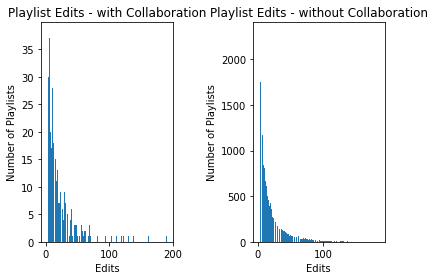

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,2,1)
ax.bar(playlist_nr_edits_on, height=playlist_nr_nr_edits_on)
plt.title('Playlist Edits - with Collaboration')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')

ax = fig.add_subplot(1,2,2)
ax.bar(playlist_nr_edits_off, height=playlist_nr_nr_edits_off)
plt.title('Playlist Edits - without Collaboration')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')

plt.tight_layout()
plt.show()

## Duration of Playlists

In [68]:
playlist_len_ms = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        playlist_len_ms.append(playlist['duration_ms'])

In [69]:
playlist_len_ms.sort()

In [70]:
playlist_len_ms
playlist_len_mins = [(x / 1000)/60 for x in playlist_len_ms] # in mins

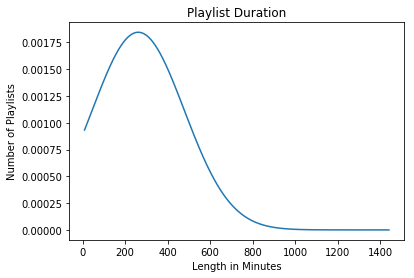

In [71]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

hmean = np.mean(playlist_len_mins)
hstd = np.std(playlist_len_mins)
pdf = stats.norm.pdf(playlist_len_mins, hmean, hstd)
plt.title('Playlist Duration')
plt.xlabel('Length in Minutes')
plt.ylabel('Number of Playlists')

plt.plot(playlist_len_mins, pdf) # including h here is crucial

## Artists vs. Tracks

In [171]:
artists_v_tracks = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        artists_v_tracks.append((playlist['num_artists'], playlist['num_tracks']))

In [172]:
artists_v_tracks.sort(key=lambda tup: tup[1]) # sort by nr of tracks per playlist

In [173]:
nr_artists=[t[0] for t in artists_v_tracks]
nr_tracks=[t[1] for t in artists_v_tracks]

In [178]:
nr_artists_avg = movingaverage(nr_artists, 500)

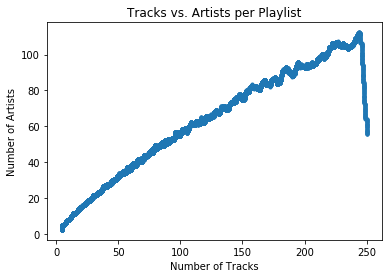

In [179]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nr_tracks, nr_artists_avg, marker='.')
plt.title('Tracks vs. Artists per Playlist')
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Artists')
plt.show()

## Edits vs. Artists

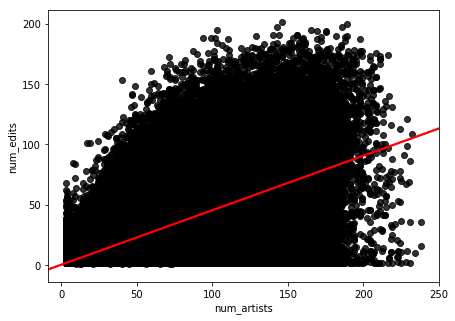

In [119]:
ax = sns.regplot(x="num_artists", y="num_edits", data=playlistDataDF, scatter_kws={"color": "black"}, line_kws={"color": "red"})
#ax.set_yscale('log')

## Artists vs. Albums

In [8]:
artists_v_albums = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        artists_v_albums.append((playlist['num_artists'], playlist['num_albums']))

In [9]:
artists_v_albums.sort(key=lambda tup: tup[0]) # sort by nr of artists per playlist

In [10]:
nr_artists=[t[0] for t in artists_v_albums]
nr_albums=[t[1] for t in artists_v_albums]

In [11]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [24]:
nr_albums_av = movingaverage(nr_albums, 2)

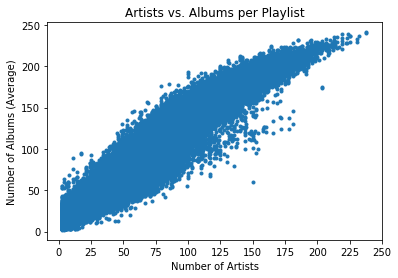

In [25]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nr_artists, nr_albums_av, marker='.')
plt.title('Artists vs. Albums per Playlist')
ax.set_xticks(np.arange(0, 251, 25))
plt.xlabel('Number of Artists')
plt.ylabel('Number of Albums')
plt.show()

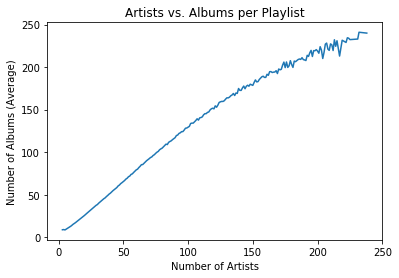

In [40]:
ax.set_xticks(np.arange(0, 251, 25))
plt.title('Artists vs. Albums per Playlist')
plt.xlabel('Number of Artists')
plt.ylabel('Number of Albums (Average)')
plt.plot(playlistDataDF.groupby(['num_artists'])['num_albums'].mean())

Close to linear relationship as expected between number of artists and albums on average. More noise towards the higher range due to lack of data points (see number of artists univariate distribution) compared to smooth line in the lower ranges.

## Day of Week vs. Number of Tracks

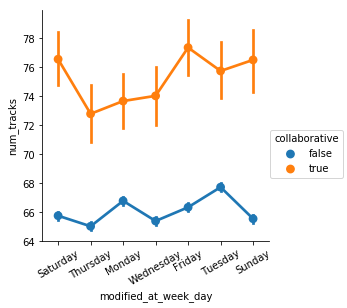

In [124]:
g = sns.factorplot(x="modified_at_week_day", y="num_tracks", hue="collaborative", data=playlistDataDF)
g.set_xticklabels(rotation=30)

## Last Modified Time (Month) vs. Number of Tracks

In [112]:
time_v_tracks = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        time_v_tracks.append((int(datetime.fromtimestamp(playlist['modified_at']).strftime('%m')), playlist['num_tracks']))

In [ ]:
time_v_tracks.sort(key=lambda tup: tup[0]) # sort by month

In [115]:
months = [i for i in range(1, 13)]
monthly_avg = []
for i in range(1, 13):
    total=0
    nr=0
    for tvt in time_v_tracks:
        if tvt[0] == i:
            total+=tvt[1]
            nr+=1
    monthly_avg.append(total/nr) 

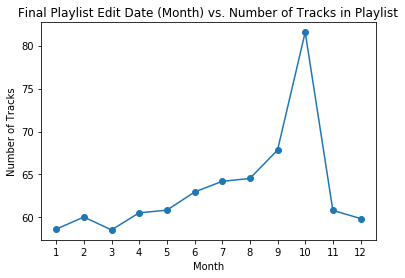

In [149]:
plt.plot(months, monthly_avg, '-o')
plt.title('Final Playlist Edit Date (Month) vs. Number of Tracks in Playlist')
plt.xlabel('Month')
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('Number of Tracks')
plt.show()

Clear rise in number of tracks in playlists where edits were stopped in October. And a general rise towards the end of the year.

## Last Modified Time (Year) vs. Number of Tracks

In [38]:
time_v_tracks = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        time_v_tracks.append((int(datetime.fromtimestamp(playlist['modified_at']).strftime('%Y')), playlist['num_tracks']))

In [39]:
years=[t[0] for t in time_v_tracks]
set(years)

{2011, 2012, 2013, 2014, 2015, 2016, 2017}

In [40]:
years = [i for i in range(2011, 2018)]
yearly_avg = []
for i in range(2011, 2018):
    total=0
    nr=0
    for tvt in time_v_tracks:
        if tvt[0] == i:
            total+=tvt[1]
            nr+=1
    yearly_avg.append(total/nr) 

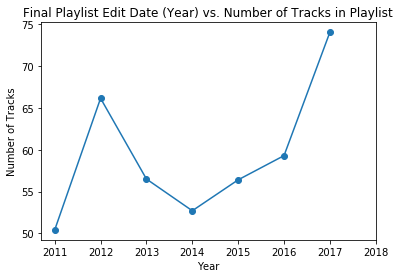

In [41]:
plt.plot(years, yearly_avg, '-o')
plt.title('Final Playlist Edit Date (Year) vs. Number of Tracks in Playlist')
plt.xlabel('Year')
plt.xticks(np.arange(2011, 2019, 1.0))
plt.ylabel('Number of Tracks')
plt.show()

Not a general rise in playlist length against years. Sharp drop in 2014 with 2017 (the most recent year in the dataset) with the most tracks in playlists. The more recent last edits such as in 2017 could be playlists maintained over several years.

## Playlist Followers

In [59]:
playlistDataDF['num_followers'].describe()

count    1000000.000000
mean           2.597746
std          128.851145
min            1.000000
25%            1.000000
50%            1.000000
75%            1.000000
max        71643.000000
Name: num_followers, dtype: float64

In [77]:
playlistDataDF[playlistDataDF.num_followers == 1]['num_followers'].describe()

count    754219.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: num_followers, dtype: float64

In [75]:
playlistDataDF[playlistDataDF.num_followers > 2]['num_followers'].describe()

count    96181.000000
mean        16.056466
std        415.232926
min          3.000000
25%          3.000000
50%          4.000000
75%          5.000000
max      71643.000000
Name: num_followers, dtype: float64

In [76]:
playlistDataDF[playlistDataDF.num_followers > 10]['num_followers'].describe()

count     6512.000000
mean       181.199939
std       1586.713812
min         11.000000
25%         13.000000
50%         18.000000
75%         38.000000
max      71643.000000
Name: num_followers, dtype: float64

In [71]:
playlistDataDF[playlistDataDF.num_followers > 100]['num_followers'].describe()

count      816.000000
mean      1282.363971
std       4327.054601
min        101.000000
25%        159.000000
50%        295.000000
75%        836.250000
max      71643.000000
Name: num_followers, dtype: float64

In [73]:
playlistDataDF[playlistDataDF.num_followers > 1000]['num_followers'].describe()

count      176.000000
mean      4829.005682
std       8419.844347
min       1011.000000
25%       1473.500000
50%       2230.500000
75%       4259.250000
max      71643.000000
Name: num_followers, dtype: float64

Only 6512 playlists of 1 million that have a follower counts of greater than 10. 176 playlists above 1000. 754219 have counts equal to 1.

## Followers vs. Number of Tracks

In [37]:
followers_v_nr_tracks = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        followers_v_nr_tracks.append((playlist['num_tracks'], playlist['num_followers']))

In [38]:
followers_v_nr_tracks.sort(key=lambda tup: tup[0]) # sort by nr tracks

In [39]:
nr_tracks=[t[0] for t in followers_v_nr_tracks]
nr_followers=[t[1] for t in followers_v_nr_tracks]

In [48]:
from math import log
nr_followers_av = movingaverage(nr_followers, 3000)

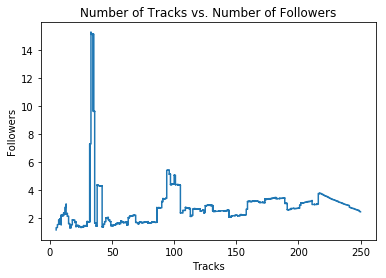

In [85]:
plt.plot(nr_tracks, nr_followers_av)
plt.title('Number of Tracks vs. Number of Followers')
plt.xlabel('Tracks')
plt.ylabel('Followers')
plt.show()

A few playlists with significantly higher followers drive the averages up in the 35-40 range. An order of magnitude increase in track length in playlists indicate 1-2 more followers higher as a general trend.

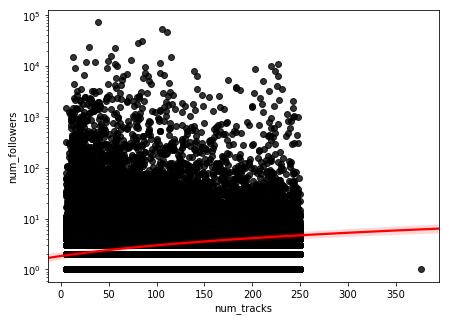

In [97]:
ax = sns.regplot(x="num_tracks", y="num_followers", data=playlistDataDF, scatter_kws={"color": "black"}, line_kws={"color": "red"})
ax.set_yscale('log')

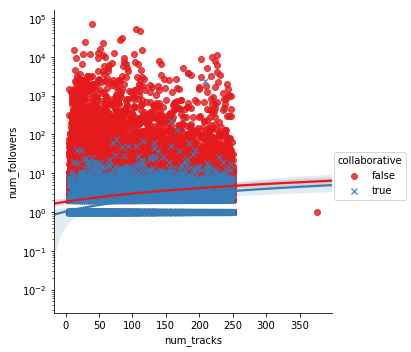

In [96]:
grid = sns.lmplot(x="num_tracks", y="num_followers", hue="collaborative", data=playlistDataDF, markers=["o", "x"], palette="Set1")
grid.set(yscale="log")

Collaborating on a playlist or not has the same effect as the number of tracks increases versus follower count.

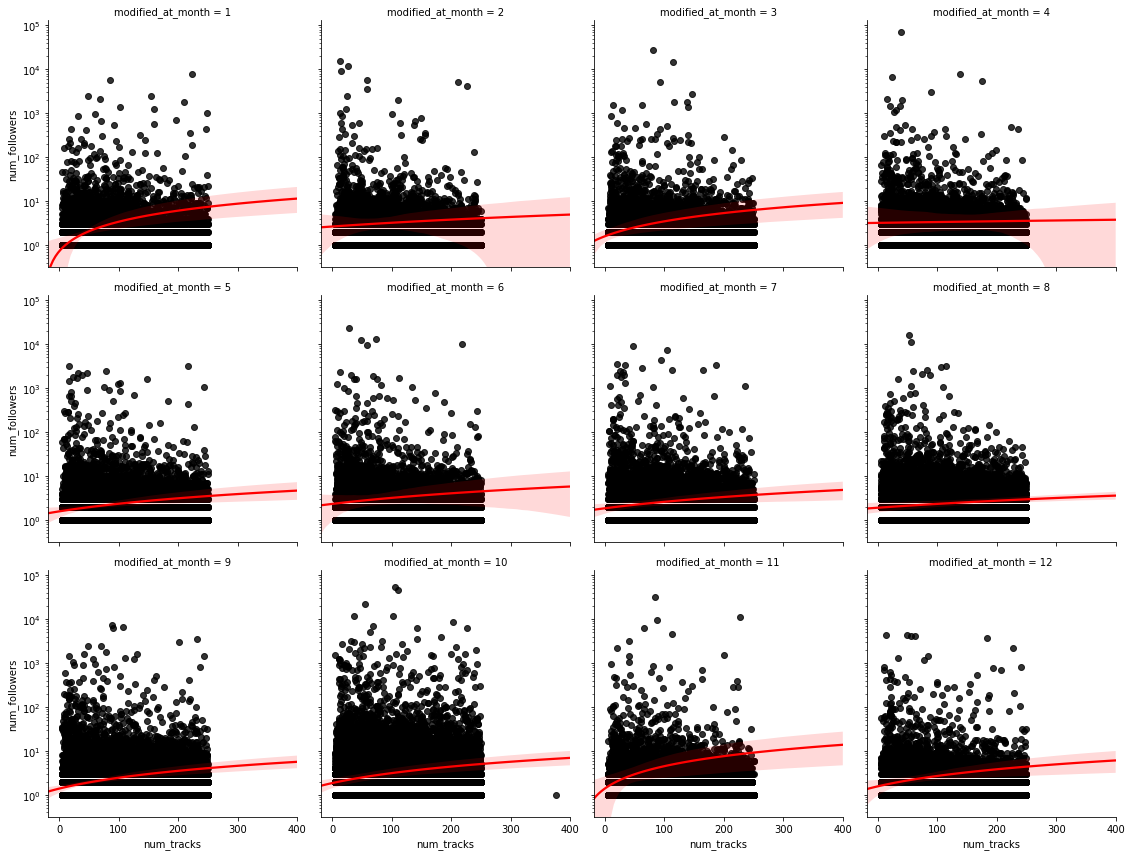

In [103]:
grid = sns.lmplot(x="num_tracks", y="num_followers", col="modified_at_month", data=playlistDataDF, col_wrap=4, size=4, scatter_kws={"color": "black"}, line_kws={"color": "red"})
grid.fig.tight_layout()
grid.set(yscale="log")

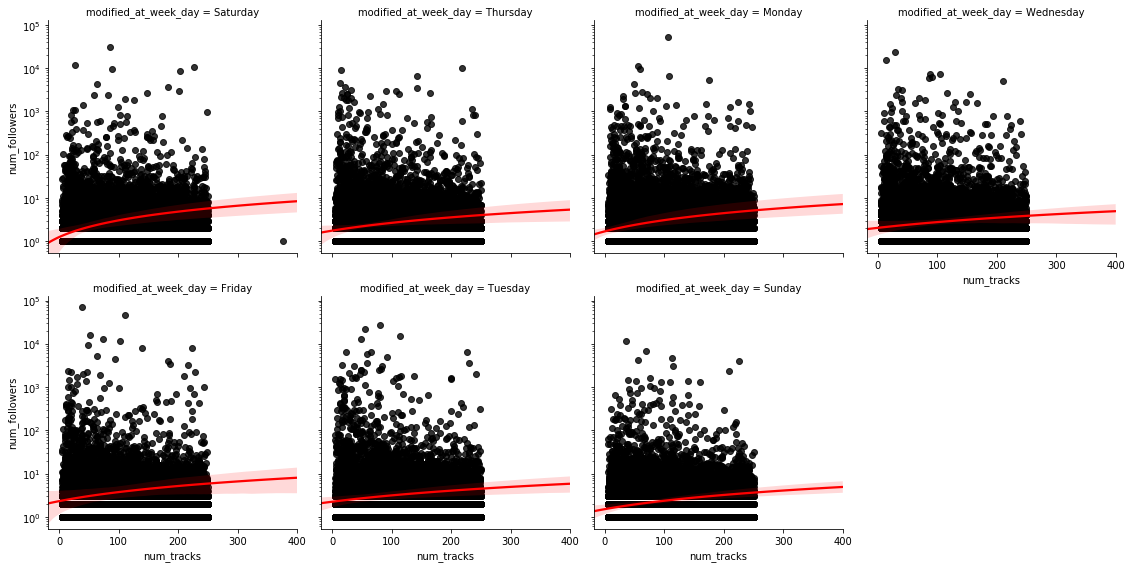

In [111]:
grid = sns.lmplot(x="num_tracks", y="num_followers", col="modified_at_week_day", data=playlistDataDF, col_wrap=4, size=4, scatter_kws={"color": "black"}, line_kws={"color": "red"})
grid.fig.tight_layout()
grid.set(yscale="log")

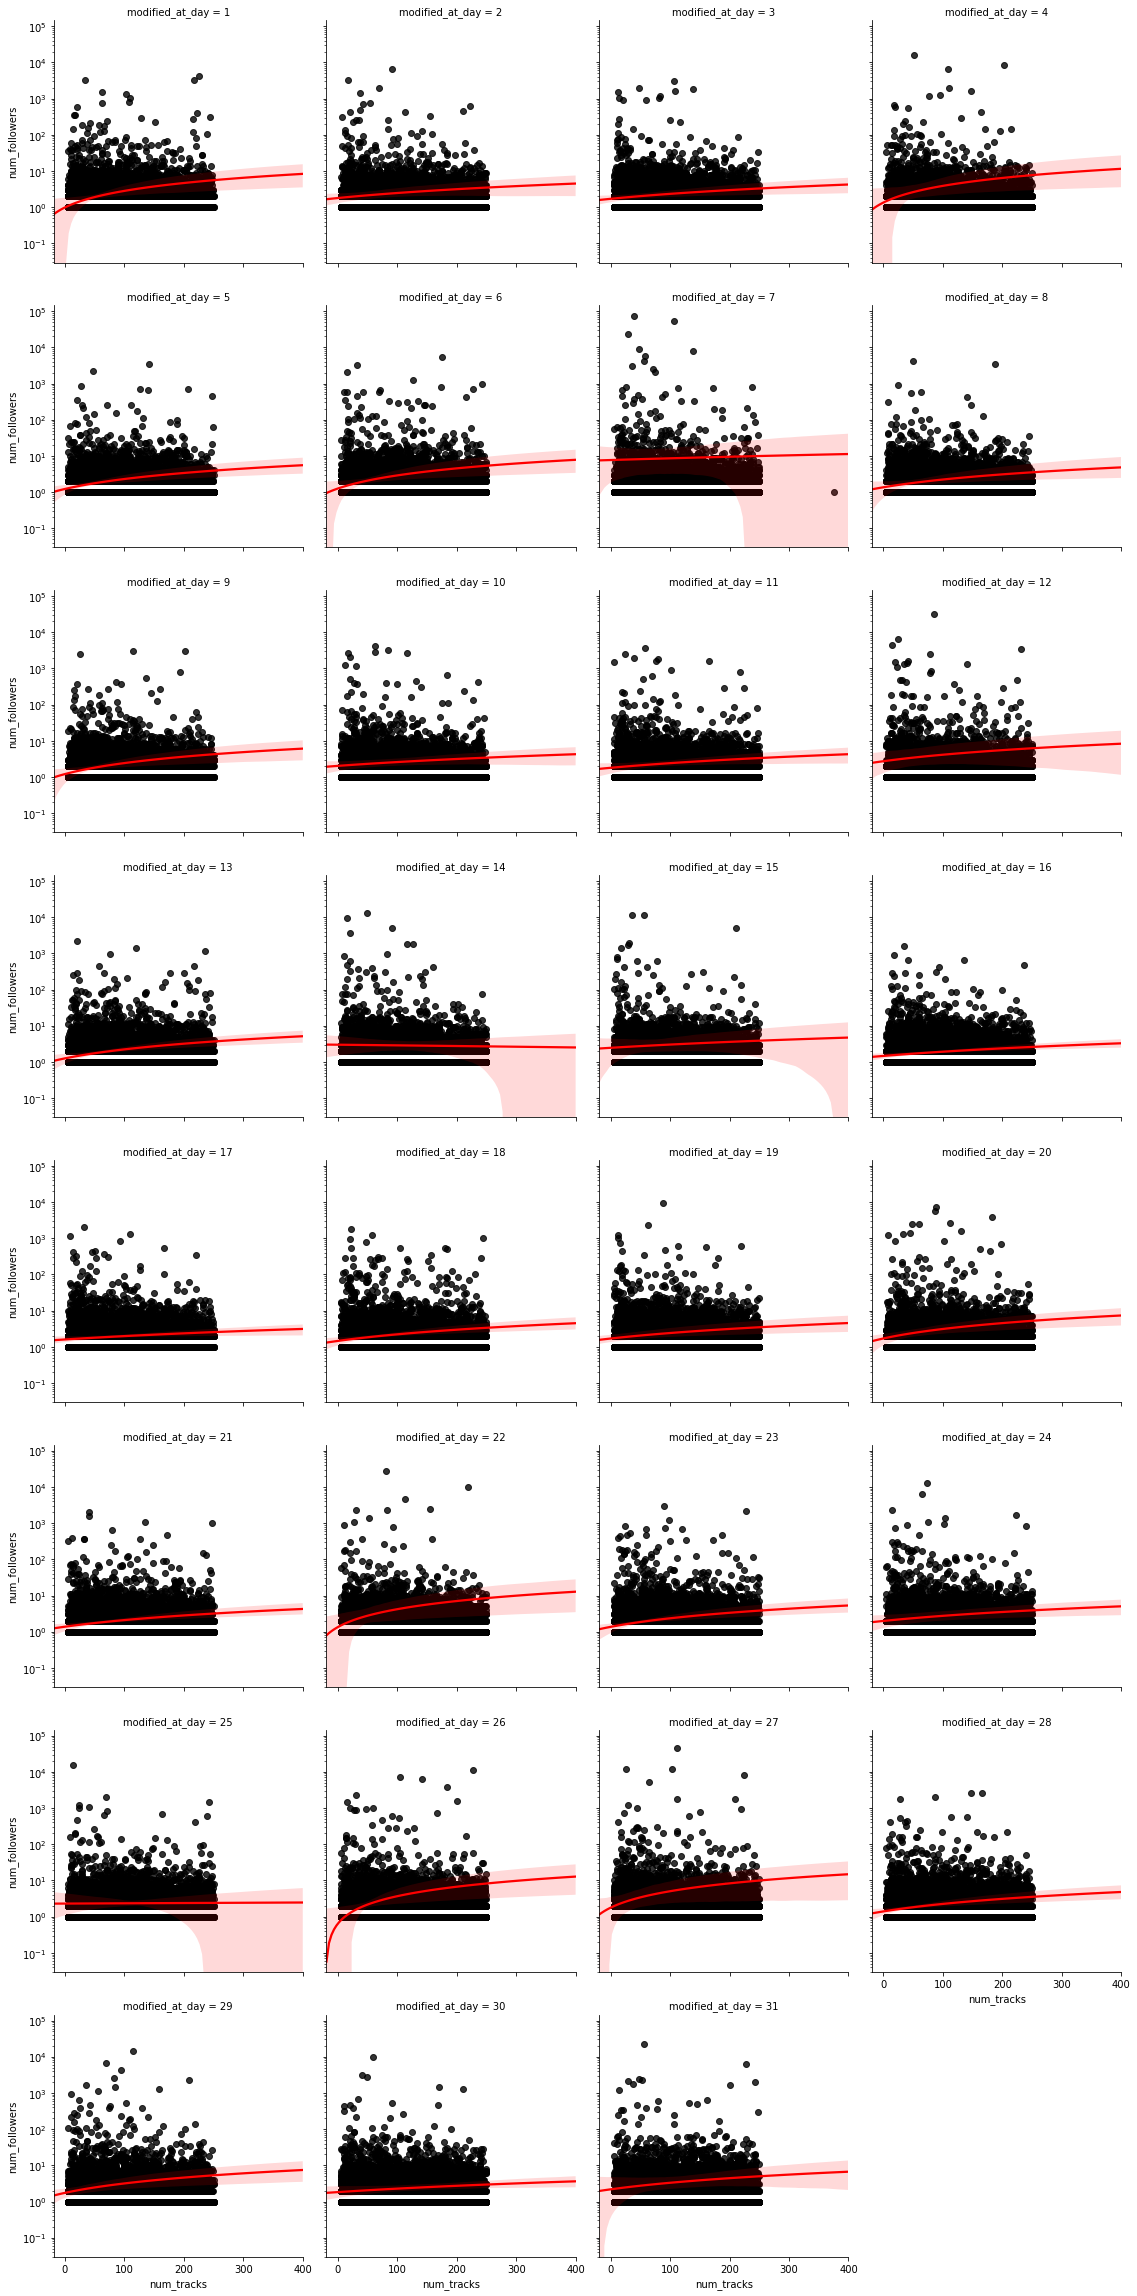

In [116]:
grid = sns.lmplot(x="num_tracks", y="num_followers", col="modified_at_day", data=playlistDataDF, col_wrap=4, size=4, scatter_kws={"color": "black"}, line_kws={"color": "red"})
grid.fig.tight_layout()
grid.set(yscale="log")

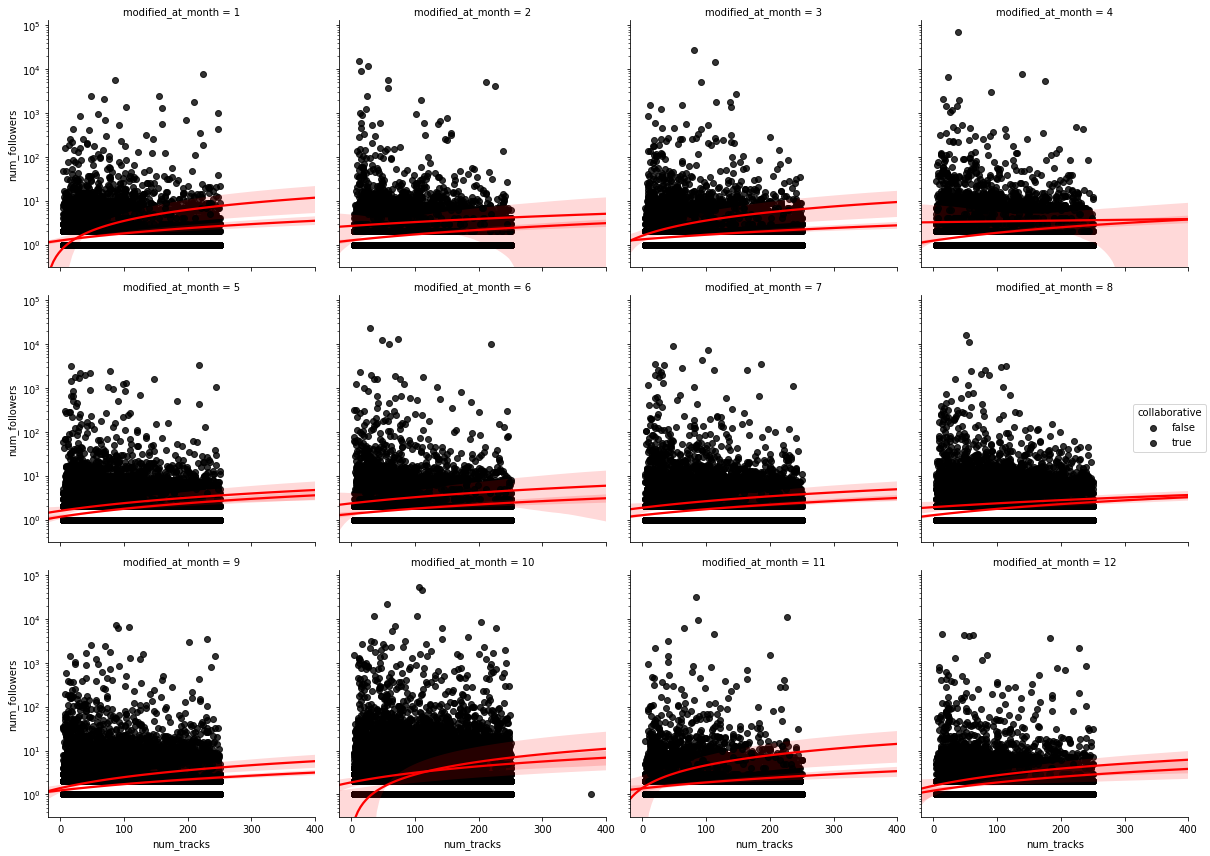

In [117]:
grid = sns.lmplot(x="num_tracks", y="num_followers", hue="collaborative", col="modified_at_month", data=playlistDataDF, col_wrap=4, size=4, scatter_kws={"color": "black"}, line_kws={"color": "red"})
grid.fig.tight_layout()
grid.set(yscale="log")

## Followers vs. Time (Month and Year)

In [104]:
followers_v_month = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        followers_v_month.append((int(datetime.fromtimestamp(playlist['modified_at']).strftime('%m')), playlist['num_followers']))

In [105]:
followers_v_year = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        followers_v_year.append((int(datetime.fromtimestamp(playlist['modified_at']).strftime('%Y')), playlist['num_followers']))

In [106]:
months = [i for i in range(1, 13)]
monthly_avg = []
for i in range(1, 13):
    total=0
    nr=0
    for tvt in followers_v_month:
        if tvt[0] == i:
            total+=tvt[1]
            nr+=1
    monthly_avg.append(total/nr) 

In [107]:
years = [i for i in range(2011, 2018)]
yearly_avg = []
for i in range(2011, 2018):
    total=0
    nr=0
    for tvt in followers_v_year:
        if tvt[0] == i:
            total+=tvt[1]
            nr+=1
    yearly_avg.append(total/nr) 

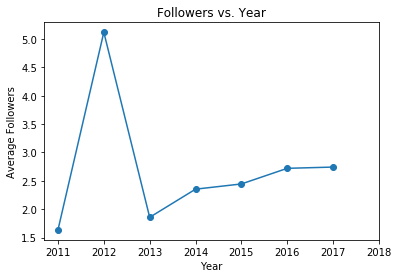

In [108]:
plt.plot(years, yearly_avg, '-o')
plt.title('Followers vs. Year')
plt.xlabel('Year')
plt.xticks(np.arange(2011, 2019, 1.0))
plt.ylabel('Average Followers')
plt.show()

In [80]:
playlistDataDF[playlistDataDF.modified_at_year == 2017]['num_followers'].describe()

count    570806.000000
mean          2.537748
std         131.061196
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max       71643.000000
Name: num_followers, dtype: float64

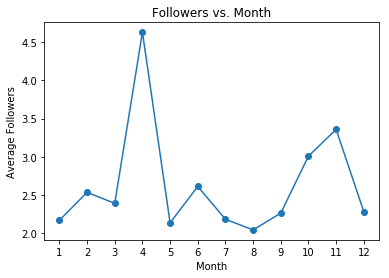

In [109]:
plt.plot(months, monthly_avg, '-o')
plt.title('Followers vs. Month')
plt.xlabel('Month')
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('Average Followers')
plt.show()

A small number of playlists with very high follower counts drive the average for April and 2012 up.

## Followers vs. Number of Edits

In [65]:
followers_v_edits = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        followers_v_edits.append((playlist['num_edits'], playlist['num_followers']))

In [67]:
followers_v_edits.sort(key=lambda tup: tup[0]) # sort by edits

In [68]:
nr_edits=[t[0] for t in followers_v_edits]
nr_followers=[t[1] for t in followers_v_edits]

In [76]:
nr_followers_av = movingaverage(nr_followers, 4000)

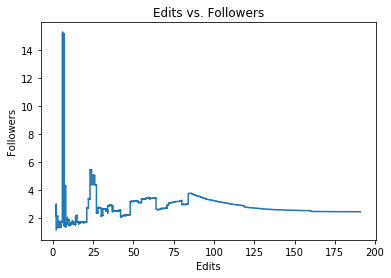

In [81]:
plt.plot(nr_edits, nr_followers_av)
plt.title('Edits vs. Followers')
plt.xlabel('Edits')
plt.ylabel('Followers')
plt.show()

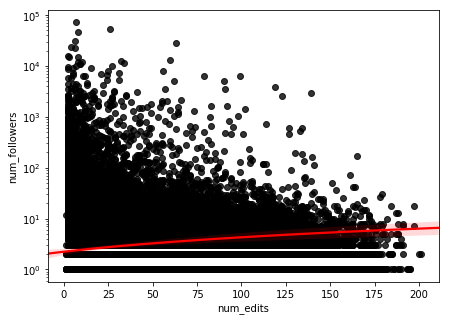

In [112]:
ax = sns.regplot(x="num_edits", y="num_followers", data=playlistDataDF, scatter_kws={"color": "black"}, line_kws={"color": "red"})
ax.set_yscale('log')

## Followers vs. Number of Artists

In [101]:
followers_v_artists = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        followers_v_artists.append((playlist['num_artists'], playlist['num_followers']))

In [102]:
followers_v_artists.sort(key=lambda tup: tup[0]) # sort by nr artists

In [103]:
nr_artists=[t[0] for t in followers_v_artists]
nr_followers=[t[1] for t in followers_v_artists]

In [104]:
nr_followers_av = movingaverage(nr_followers, 5000)

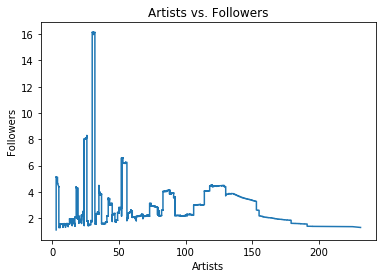

In [105]:
plt.plot(nr_artists, nr_followers_av)
plt.title('Artists vs. Followers')
plt.xlabel('Artists')
plt.ylabel('Followers')
plt.xticks(np.arange(0, 250, 50))
plt.show()

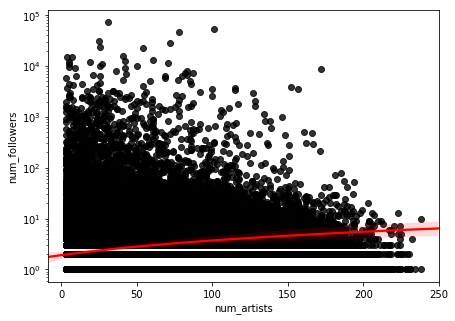

In [113]:
ax = sns.regplot(x="num_artists", y="num_followers", data=playlistDataDF, scatter_kws={"color": "black"}, line_kws={"color": "red"})
ax.set_yscale('log')

## Correlation Matrix

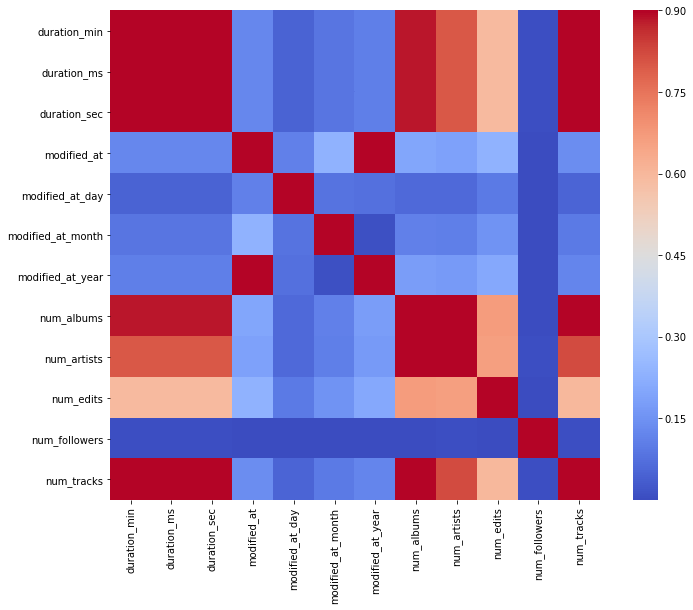

In [110]:
#correlation matrix
corrmat = playlistDataDF.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True, cmap='coolwarm');

Number of followers do not correlate strongly with any other attribute -- only slightly more against number of artists.

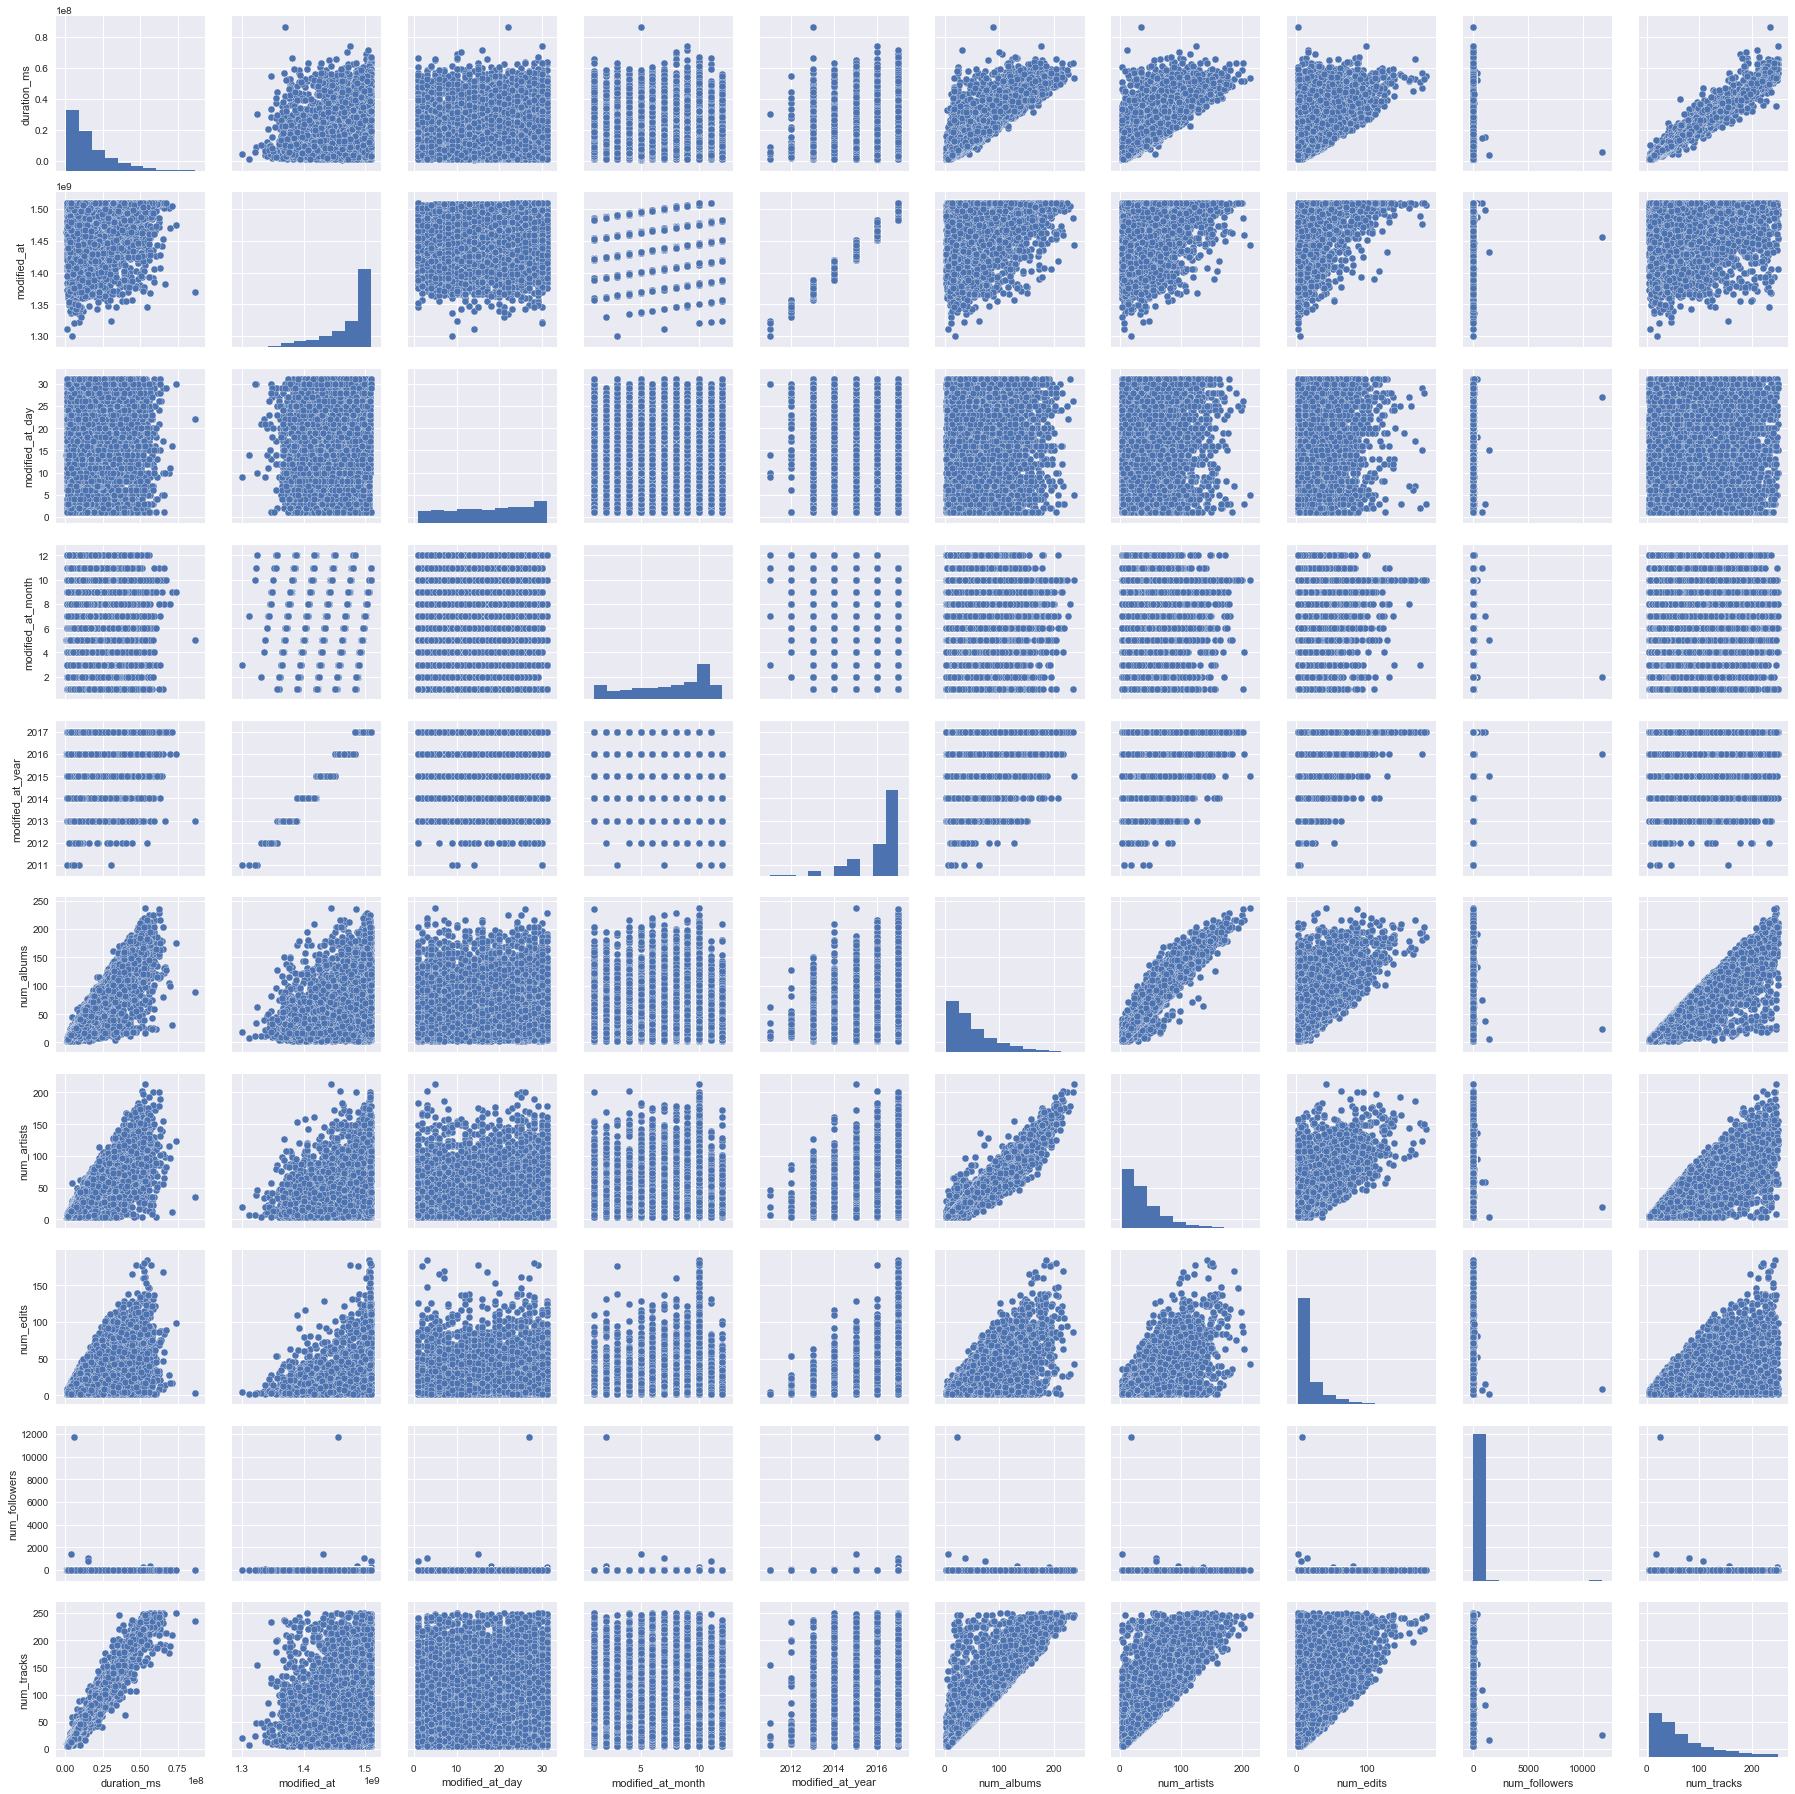

In [159]:
sns.set()
sns.pairplot(playlistDataDF[list(playlistDataDF.columns.values)], size = 2.5)
plt.show()

## Collaborative vs. Other Attributes

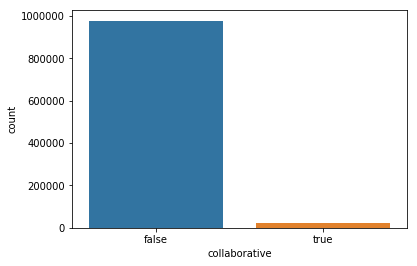

In [6]:
sns.countplot(x='collaborative', data=playlistDataDF) #imbalance

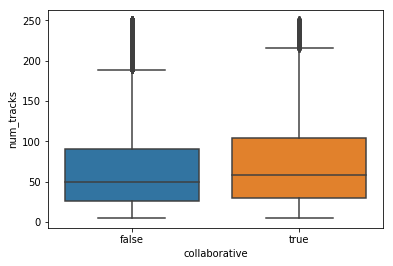

In [111]:
sns.boxplot(x="collaborative", y="num_tracks", data=playlistDataDF)

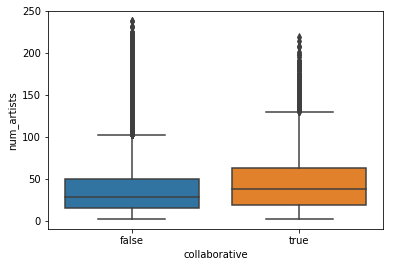

In [112]:
sns.boxplot(x="collaborative", y="num_artists", data=playlistDataDF)

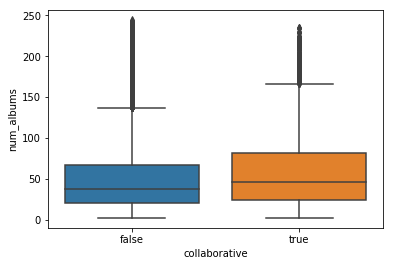

In [113]:
sns.boxplot(x="collaborative", y="num_albums", data=playlistDataDF)

More than one user editing a playlist contributes to more unique artists, albums and tracks as one would expect. 

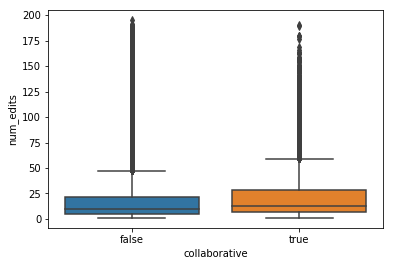

In [114]:
sns.boxplot(x="collaborative", y="num_edits", data=playlistDataDF)

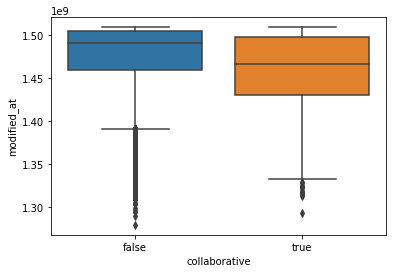

In [115]:
sns.boxplot(x="collaborative", y="modified_at", data=playlistDataDF)

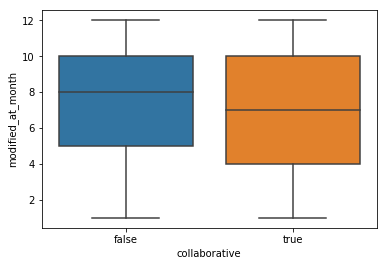

In [117]:
sns.boxplot(x="collaborative", y="modified_at_month", data=playlistDataDF)

## Playlist Year vs. Month

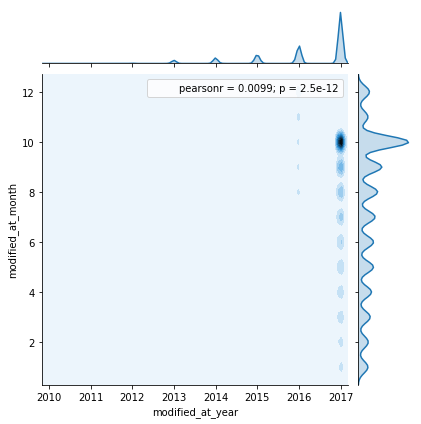

In [126]:
sns.jointplot(playlistDataDF['modified_at_year'], playlistDataDF['modified_at_month'], kind="kde")

## Playlist Month vs. Day

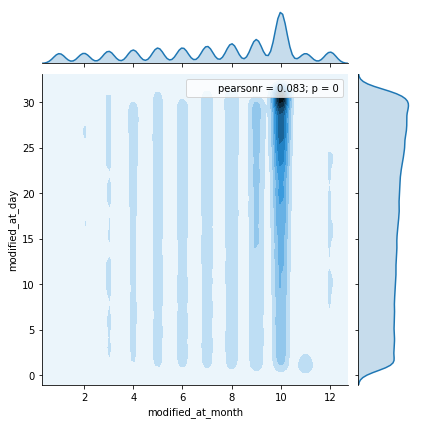

In [127]:
sns.jointplot(playlistDataDF['modified_at_month'], playlistDataDF['modified_at_day'], kind="kde")

It is not clear why the later months and days receive higher numbers of last edit counts.

## t-SNE

In [5]:
from sklearn import manifold

In [47]:
X = playlistDataDF[['num_tracks', 'num_artists', 'num_albums', 'num_followers', 
                'num_edits', 'modified_at_day', 'modified_at_month',
                   'modified_at_year']].values.astype('int32')

In [48]:
XCollab = pd.get_dummies(playlistDataDF[['collaborative']].values[:,0]).values
X = np.concatenate((X, XCollab), axis=1)

In [55]:
tsne = manifold.TSNE(n_components=2, random_state=0, verbose=3)
Y = tsne.fit_transform(X[:20000, :])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.271s...
[t-SNE] Computed neighbors for 20000 samples in 2.094s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sam

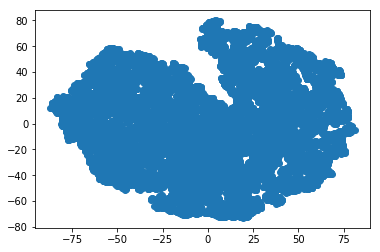

In [56]:
plt.scatter(Y[:, 0], Y[:, 1])
plt.axis('tight')
plt.show()

## Spotify API Data

In [5]:
trackDataDF = d.loadFormattedTracks(1)
trackDataDF.head(2)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.20it/s]


,album_name,album_uri,artist_name,artist_uri,duration_ms,pos,track_name,track_uri
0,The Cookbook,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk,226863,0,Lose Control (feat. Ciara & Fat Man Scoop),spotify:track:0UaMYEvWZi0ZqiDOoHU3YI
1,In The Zone,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,Britney Spears,spotify:artist:26dSoYclwsYLMAKD3tpOr4,198800,1,Toxic,spotify:track:6I9VzXrHxO9rA9A5euc8Ak


In [14]:
trackDataDF.size

540024

In [31]:
d.saveTrackDf(trackDataDF10k)

In [27]:
trackDataDF10k = trackDataDF.head(10000)

In [28]:
trackDataDF10k = d.addTrackAPIFields(trackDataDF10k)

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...5secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...5secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...5secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...5secs
retrying ...5secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...5secs
retrying ...5secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...5secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying .

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [33]:
trackDataDF10k.head(10)

,album_name,album_uri,artist_name,artist_uri,duration_ms,pos,track_name,track_uri,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,The Cookbook,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk,226863,0,Lose Control (feat. Ciara & Fat Man Scoop),spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,65.0,0.904,0.813,4.0,-7.105,0.0,0.1210,0.03110,0.006970,0.0471,0.810,125.461
1,In The Zone,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,Britney Spears,spotify:artist:26dSoYclwsYLMAKD3tpOr4,198800,1,Toxic,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,78.0,0.774,0.838,5.0,-3.914,0.0,0.1140,0.02490,0.025000,0.2420,0.924,143.040
2,Dangerously In Love (Alben für die Ewigkeit),spotify:album:25hVFAxTlDvXbx2X2QkUkE,Beyoncé,spotify:artist:6vWDO969PvNqNYHIOW5v0m,235933,2,Crazy In Love,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,59.0,0.664,0.758,2.0,-6.583,0.0,0.2100,0.00238,0.000000,0.0598,0.701,99.259
3,Justified,spotify:album:6QPkyl04rXwTGlGlcYaRoW,Justin Timberlake,spotify:artist:31TPClRtHm23RisEBtV3X7,267266,3,Rock Your Body,spotify:track:1AWQoqb9bSvzTjaLralEkT,72.0,0.891,0.714,4.0,-6.055,0.0,0.1400,0.20200,0.000234,0.0521,0.818,100.972
4,Hot Shot,spotify:album:6NmFmPX56pcLBOFMhIiKvF,Shaggy,spotify:artist:5EvFsr3kj42KNv97ZEnqij,227600,4,It Wasn't Me,spotify:track:1lzr43nnXAijIGYnCT8M8H,75.0,0.853,0.606,0.0,-4.596,1.0,0.0713,0.05610,0.000000,0.3130,0.654,94.759
5,Confessions,spotify:album:0vO0b1AvY49CPQyVisJLj0,Usher,spotify:artist:23zg3TcAtWQy7J6upgbUnj,250373,5,Yeah!,spotify:track:0XUfyU2QviPAs6bxSpXYG4,26.0,0.881,0.788,2.0,-4.669,1.0,0.1680,0.02120,0.000000,0.0377,0.592,104.997
6,Confessions,spotify:album:1RM6MGv6bcl6NrAG8PGoZk,Usher,spotify:artist:23zg3TcAtWQy7J6upgbUnj,223440,6,My Boo,spotify:track:68vgtRHr7iZHpzGpon6Jlo,76.0,0.662,0.507,5.0,-8.238,1.0,0.1180,0.25700,0.000000,0.0465,0.676,86.412
7,PCD,spotify:album:5x8e8UcCeOgrOzSnDGuPye,The Pussycat Dolls,spotify:artist:6wPhSqRtPu1UhRCDX5yaDJ,225560,7,Buttons,spotify:track:3BxWKCI06eQ5Od8TY2JBeA,64.0,0.544,0.823,2.0,-4.318,1.0,0.3200,0.15800,0.000000,0.2680,0.434,210.750
8,The Writing's On The Wall,spotify:album:283NWqNsCA9GwVHrJk59CG,Destiny's Child,spotify:artist:1Y8cdNmUJH7yBTd9yOvr5i,271333,8,Say My Name,spotify:track:7H6ev70Weq6DdpZyyTmUXk,77.0,0.713,0.678,5.0,-3.525,0.0,0.1020,0.27300,0.000000,0.1490,0.734,138.009
9,Speakerboxxx/The Love Below,spotify:album:1UsmQ3bpJTyK6ygoOOjG1r,OutKast,spotify:artist:1G9G7WwrXka3Z1r7aIDjI7,235213,9,Hey Ya! - Radio Mix / Club Mix,spotify:track:2PpruBYCo4H7WOBJ7Q2EwM,76.0,0.728,0.974,4.0,-2.261,0.0,0.0665,0.10300,0.000532,0.1750,0.965,79.526


## Univariate Track Features

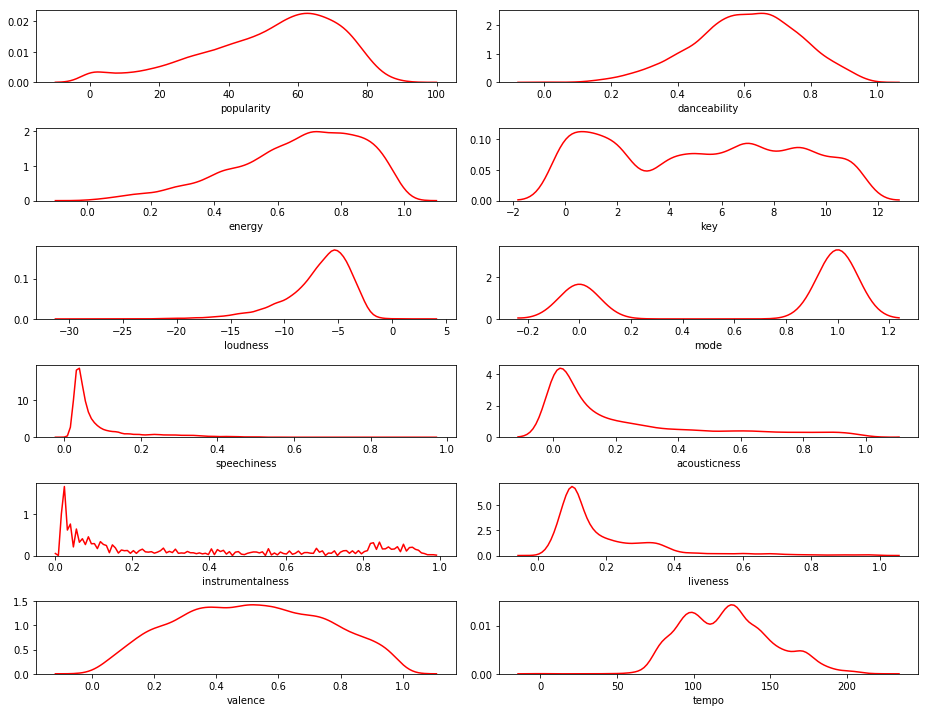

In [51]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
cols = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
for i in range(1, len(cols)+1):
    plt.subplot(6, 2, i)
    sns.distplot(trackDataDF10k[cols[i-1]], hist=False, color='r')
plt.tight_layout()